In [2]:
import matplotlib.pyplot as plt
from os import path

from src.ingest_data import ingest_data_dir

In [13]:
experiment_folders = ['enterprise_baseline', 'enterprise_decoy', 'enterprise_honeyservice']

# Open all json files and store them in a list
enterprise_simple_data = ingest_data_dir(path.join('data', 'enterprise_simple'))
enterprise_capabilities_data = ingest_data_dir(path.join('data', 'enterprise_capabilities'))

In [14]:
# For each experiment get runtime data
def get_runtime_data(experiment_data):
    runtime_data = {}
    
    for experiment_type in experiment_data.keys():
        runtime_data[experiment_type] = []
        experiment_type_data = experiment_data[experiment_type]
        for experiment in experiment_type_data:
            # Convert data to minutes
            experiment['execution_time'] = (experiment['execution_time']) / 60
            runtime_data[experiment_type].append(experiment['execution_time'])
    
    return runtime_data

enterprise_simple_runtime_data = get_runtime_data(enterprise_simple_data)
enterprise_capabilities_runtime_data = get_runtime_data(enterprise_capabilities_data)

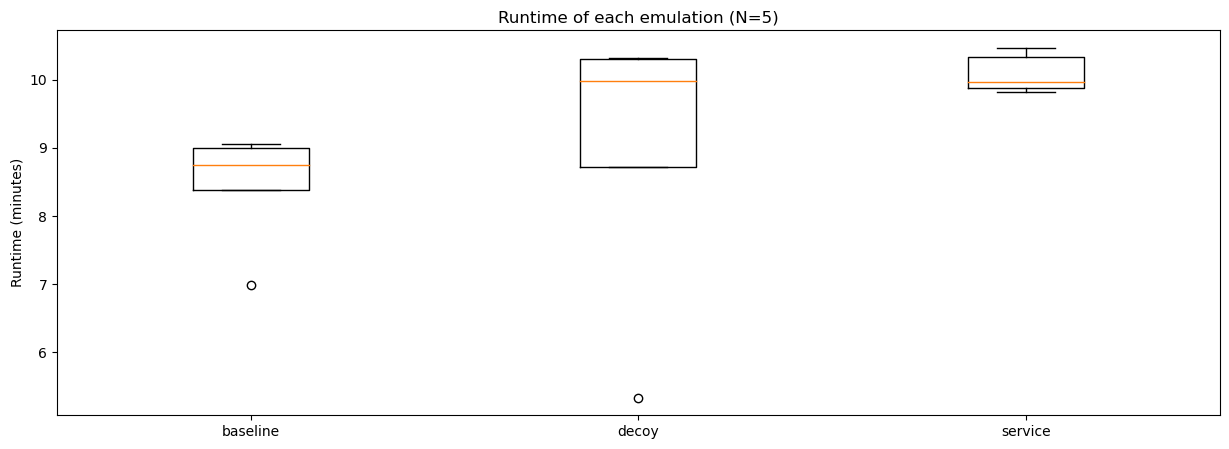

In [27]:
def plot_runtime_data(data):
    # Remove 'enterprise_' from data keys
    data = {key.replace('enterprise_', ''): value for key, value in data.items()}
    data = {key.replace('honey', ''): value for key, value in data.items()}

    # Sory keys
    data = dict(sorted(data.items()))

    fig, ax = plt.subplots()
    # make figure wider
    fig.set_size_inches(15, 5)
    ax.boxplot(data.values())
    ax.set_xticklabels(data.keys())
    ax.set_ylabel('Runtime (minutes)')
    ax.set_title('Runtime of each emulation (N=5)')
    plt.show()

# Plot runtime data in box and whisker plot
plot_runtime_data(enterprise_simple_runtime_data)

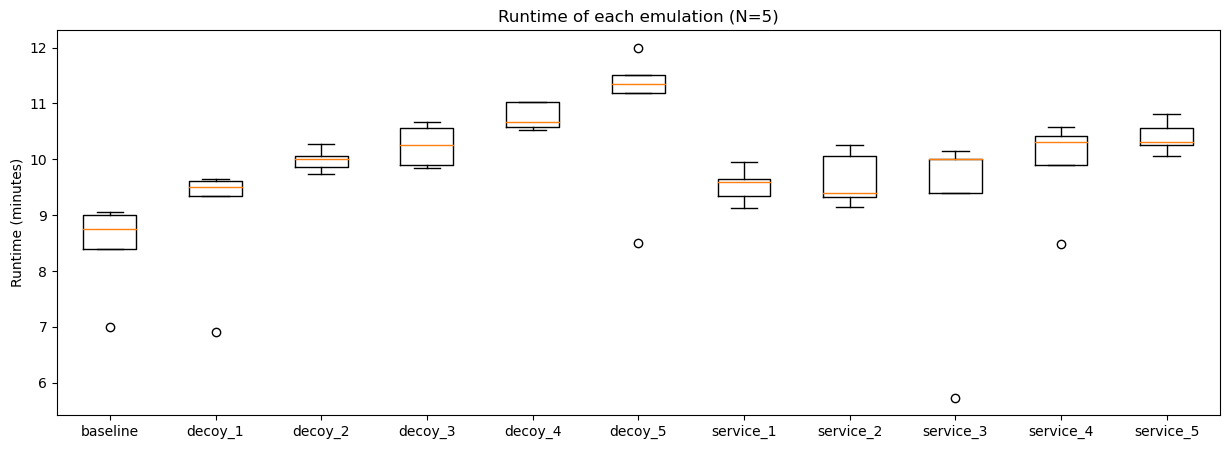

In [28]:
plot_runtime_data(enterprise_capabilities_runtime_data)